In [313]:
import pandas as pd
A = pd.read_csv("E:\data science class/training_set.csv")

In [314]:
A.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


# Data Preprocessing

# Treating credit history as catgorical

In [315]:
A['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [316]:
A['Credit_History']=A['Credit_History'].fillna(1.0)

In [317]:
A.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [318]:
def replacer(df):
    Q = pd.DataFrame(df.isna().sum())
    Q.columns=["CT"]
    w = list(Q[Q.CT>0].index)
    
    cat = []
    con = []
    for i in w:
        if(df[i].dtypes=="object"):
            cat.append(i)
        else:
            con.append(i)

    for i in con:
        replacer = df[i].mean()
        df[i] = df[i].fillna(replacer)

    for i in cat:
        replacer = pd.DataFrame(df[i].value_counts()).index[0]
        df[i] = df[i].fillna(replacer)

In [319]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [320]:
A.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [321]:
replacer(A)

In [322]:
A.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [323]:
A

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.00000,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.00000,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.00000,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.00000,0.0,187.000000,360.0,1.0,Urban,Y


In [324]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [325]:
dep = []
for i in A.Dependents:
    dep.append(int(i.replace("3+","3")))
A.Dependents=dep

In [326]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [327]:
cat = []
con = []
for i in A.columns:
    if(A[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [328]:
cat.remove("Loan_ID")
cat.remove("Loan_Status")

In [329]:
X = A[con].join(pd.get_dummies(A[cat]))

In [330]:
con

['Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [331]:
from statsmodels.api import OLS
from statsmodels.formula.api import ols
model = ols("Credit_History ~ Loan_Status",A).fit()
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(model)
Q = pd.DataFrame(anova_results)
a = Q['PR(>F)']['Loan_Status']
print("%.40f"%a)

0.0000000000000000000000000000000000000000


Logistic|NB. ----- DT|RF|AB

In [332]:
Y = A[["Loan_Status"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=33)

<AxesSubplot:>

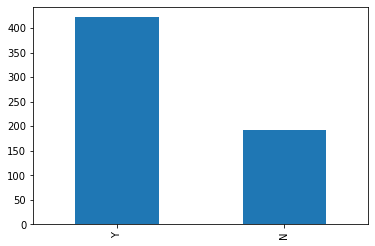

In [333]:
Y['Loan_Status'].value_counts().plot(kind="bar")

<AxesSubplot:>

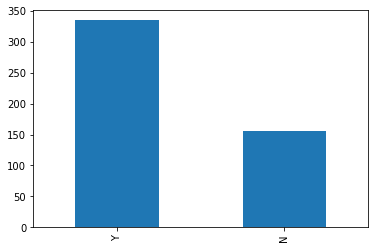

In [334]:
ytrain['Loan_Status'].value_counts().plot(kind="bar")

In [335]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
print("%.4f"%accuracy_score(ytest,pred))

0.8374


C:\Users\BHUSHAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\BHUSHAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [336]:
X.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [337]:
#X = X.drop(labels=["Dependents"],axis=1)
Y = A[["Loan_Status"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=33)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
print("%.4f"%accuracy_score(ytest,pred))

0.8374


C:\Users\BHUSHAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\BHUSHAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [338]:
X = X.drop(labels=["ApplicantIncome"],axis=1)
Y = A[["Loan_Status"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=33)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
print("%.4f"%accuracy_score(ytest,pred))

0.8374


C:\Users\BHUSHAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\BHUSHAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [339]:
Y = A[["Loan_Status"]]
X = A[con].join(pd.get_dummies(A[cat]))
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=33)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
print("%.4f"%accuracy_score(ytest,pred))

0.8374


C:\Users\BHUSHAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\BHUSHAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [340]:
Y = A[["Loan_Status"]]
X = A[con].join(pd.get_dummies(A[cat]))
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=33)
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=11,max_depth=2)
model = dtc.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
print("%.4f"%accuracy_score(ytest,pred))

0.8211


In [341]:
Y = A[["Loan_Status"]]
X = A[con].join(pd.get_dummies(A[cat]))
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=33)
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=11,max_leaf_nodes=2)
model = dtc.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
print("%.4f"%accuracy_score(ytest,pred))

0.8211


In [342]:
Y = A[["Loan_Status"]]
X = A[con].join(pd.get_dummies(A[cat]))
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=33)
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=11,max_leaf_nodes=7,n_estimators=10)
model = rfc.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
print("%.4f"%accuracy_score(ytest,pred))

0.8211


<ipython-input-342-c1af1b6a5ddb>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = rfc.fit(xtrain,ytrain)


In [343]:
Y = A[["Loan_Status"]]
X = A[con].join(pd.get_dummies(A[cat]))
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=33)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
dtc1 = DecisionTreeClassifier(max_depth=2,random_state=14)
abc = AdaBoostClassifier(dtc1,random_state=228,n_estimators=2)
model = abc.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
print("%.4f"%accuracy_score(ytest,pred))

0.8211


C:\Users\BHUSHAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [344]:
Y = A[["Loan_Status"]]
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
C = pd.DataFrame(ss.fit_transform(A[con]),columns=con)
X = C.join(pd.get_dummies(A[cat]))
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=33)
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=5)
model = knc.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
print("%.4f"%accuracy_score(ytest,pred))

0.8211


<ipython-input-344-701ab7c062ed>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model = knc.fit(xtrain,ytrain)


In [345]:
Y = A[["Loan_Status"]]
X = A[con].join(pd.get_dummies(A[cat]))
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=33)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
dtc1 = DecisionTreeClassifier(max_depth=2,random_state=14)
abc = AdaBoostClassifier(dtc1,random_state=228,n_estimators=2)
model = abc.fit(X,Y)

C:\Users\BHUSHAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [346]:
Q = pd.read_csv("E:\data science class/testing_set.csv")

In [347]:
Q.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [348]:
X.head(2)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849.00000,0.0,146.412162,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1
1,1,5405.54085,1508.0,128.000000,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0


In [349]:
Q['Credit_History']=Q['Credit_History'].fillna(1.0)
replacer(Q)

dep = []
for i in Q.Dependents:
    dep.append(int(i.replace("3+","3")))
Q.Dependents=dep

R = Q[con].join(pd.get_dummies(Q[cat]))

In [350]:
pred = model.predict(R)

In [351]:
OP = Q[['Loan_ID']]

In [352]:
OP['predicted_loan_status']=pred

<ipython-input-352-a3e5091eb78e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OP['predicted_loan_status']=pred


# Not eligible for loan

In [353]:
NE = OP[OP.predicted_loan_status=="N"]


In [354]:
R["pred_LS"]=pred

In [355]:
S = R[R.pred_LS=="N"]

In [356]:
S.head(2)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,pred_LS
7,2,3881,0,147.0,360.0,0.0,0,1,0,1,0,1,1,0,1,0,0,N
13,2,12173,0,166.0,360.0,0.0,0,1,0,1,1,0,1,0,0,1,0,N


In [357]:
S = S.drop(labels=["pred_LS"],axis=1)
S = S.drop(labels=["LoanAmount"],axis=1)

In [358]:
M = A[A['Loan_Status']=="Y"]
Y = M[["LoanAmount"]]
X = M[con].join(pd.get_dummies(M[cat]))
X = X.drop(labels=["LoanAmount"],axis=1)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
dtc1 = DecisionTreeRegressor(max_depth=2,random_state=14)
abc = AdaBoostRegressor(dtc1,random_state=228,n_estimators=2)
model = abc.fit(X,Y)

C:\Users\BHUSHAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [359]:
pred_LA=model.predict(S)

In [360]:
Y.shape

(422, 1)

In [361]:
Y.index = range(0,422)

In [362]:
#Y['pred']=pred_LA

In [363]:
len(pred_LA)

63

In [364]:
X.shape

(422, 16)

In [365]:
Y.shape

(422, 1)

In [366]:
S.index = range(0,63)

In [367]:
pred_LA = model.predict(S)

In [368]:
S['Pred_LA']=pred_LA

In [369]:
S1 = R[R.pred_LS=="N"]
S1.index = range(0,63)

In [370]:
S['Applied_LA']=S1.LoanAmount

In [371]:
S.head(2)


,Dependents,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Pred_LA,Applied_LA
0,2,3881,0,360.0,0.0,0,1,0,1,0,1,1,0,1,0,0,110.893996,147.0
1,2,12173,0,360.0,0.0,0,1,0,1,1,0,1,0,0,1,0,203.798142,166.0


# People who loans were rejected and loan term was <=20 yrs

In [372]:
prediction_data = R[R.pred_LS=="N"][R.Loan_Amount_Term<=240]
prediction_data.index=range(0,5)

<ipython-input-372-9712babb97bb>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prediction_data = R[R.pred_LS=="N"][R.Loan_Amount_Term<=240]


In [373]:
prediction_data

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,pred_LS
0,0,4456,0,131.0,180.0,0.0,0,1,0,1,1,0,1,0,0,1,0,N
1,0,3017,2845,159.0,180.0,0.0,0,1,1,0,1,0,1,0,0,0,1,N
2,0,3186,3145,150.0,180.0,0.0,0,1,0,1,1,0,1,0,0,1,0,N
3,0,2875,2416,95.0,6.0,0.0,0,1,1,0,1,0,1,0,0,1,0,N
4,3,5316,187,158.0,180.0,0.0,0,1,0,1,0,1,1,0,0,1,0,N


training data

In [374]:
import pandas as pd
A = pd.read_csv("E:\data science class/training_set.csv")
A['Credit_History']=A['Credit_History'].fillna(1.0)
replacer(A)

In [375]:
A = A[A.Loan_Status=="Y"]

In [376]:
A.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y


In [377]:
A = A.drop(labels=['Loan_ID','Loan_Status'],axis=1)

In [378]:
A.shape

(422, 11)

In [379]:
A.index = range(0,422)

In [380]:
cat = []
con = []
for i in A.columns:
    if(A[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)
A = A[con].join(pd.get_dummies(A[cat]))
#training_data
Y = A[["Loan_Amount_Term"]]
X = A.drop(labels=['Loan_Amount_Term'],axis=1)

In [381]:
Y

,Loan_Amount_Term
0,360.0
1,360.0
2,360.0
3,360.0
4,360.0
...,...
417,360.0
418,360.0
419,180.0
420,360.0


In [382]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
dtc1 = DecisionTreeRegressor(max_depth=2,random_state=14)
abc = AdaBoostRegressor(dtc1,random_state=228,n_estimators=2)
X = X.drop(labels=['Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+'],axis=1)
model = abc.fit(X,Y)

C:\Users\BHUSHAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [383]:
prediction_data.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'pred_LS'],
      dtype='object')

In [386]:
prediction_data=prediction_data.drop(labels=["pred_LS"],axis=1)
prediction_data=prediction_data.drop(labels=["Dependents",'Loan_Amount_Term'],axis=1)
model.predict(prediction_data)

array([344.28776978, 344.28776978, 344.28776978, 344.28776978,
       344.28776978])

In [387]:
prediction_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,4456,0,131.0,0.0,0,1,0,1,1,0,1,0,0,1,0
1,3017,2845,159.0,0.0,0,1,1,0,1,0,1,0,0,0,1
2,3186,3145,150.0,0.0,0,1,0,1,1,0,1,0,0,1,0
3,2875,2416,95.0,0.0,0,1,1,0,1,0,1,0,0,1,0
4,5316,187,158.0,0.0,0,1,0,1,0,1,1,0,0,1,0
